In [2]:
import os
import cv2
import random
import numpy as np

from metods import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from matplotlib import pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
def SaveGeneratedMask(Image_collection_path, save_path, modelName):
    
    test_images = os.listdir(Image_collection_path)
    x = np.zeros((len(test_images), IMG_HEIGHT, IMG_WIDTH))
    
    for i, img_id in enumerate(test_images):
        img_collection = Image_collection_path  + img_id
        img = readImages(img_collection,  IMG_HEIGHT = 128, IMG_WIDTH = 128, is_gray=0)
        x[i] = img
    model2 = load_model(modelName)
    pred_img = model2.predict(x/255.)*255.0
    
    for j, img_id in enumerate(test_images):   
        new_img_path =save_path + 'mask_' + img_id
        
        dilated = cv2.dilate(pred_img[j].copy(), None, iterations=2) #gray img
        eroded = cv2.erode(dilated.copy(), None, iterations=4) #gray img
        _ , binary_img = cv2.threshold(eroded, 120, 255, cv2.THRESH_BINARY) #binary img
        
        cv2.imwrite(new_img_path, binary_img)

In [6]:
IMG_HEIGHT = 128
IMG_WIDTH = 128

image_path = "C:\\Users\\ugur_\\Python Projects\\DATA\\Lung Segmentation\\CXR_png\\"
mask_path = "C:\\Users\\ugur_\\Python Projects\\DATA\Lung Segmentation\\masks\\"

In [8]:
#DENEMENewHealty
#read image
img = cv2.imread("C:\\Users\\ugur_\\Python Projects\\LungClassifier\\NIH Data\\Healty Mask\\mask_00000005_004.png", 0)
img3 = cv2.imread("C:\\Users\\ugur_\\Python Projects\\LungClassifier\\NIH Data\\NewHealty\\00000005_004.png", 0)
img3 = cv2.resize(img3, (IMG_HEIGHT, IMG_WIDTH))
#plt.hist(img.flat, bins= 100, range= (0,255))

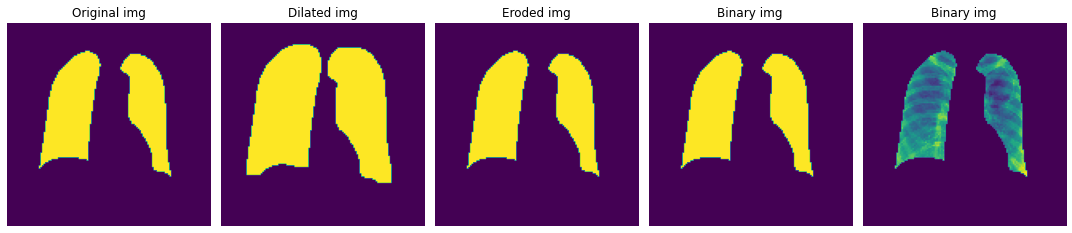

In [10]:
#DENEME
plt.figure(figsize=(15,10))
plt.axis('Off')

plt.subplot(1, 5, 1)
plt.imshow(img)
plt.title("Original img")
plt.axis('Off')

plt.subplot(1, 5, 2)
plt.imshow(dilated)
plt.title("Dilated img")
plt.axis('Off')

plt.subplot(1, 5, 3)
plt.imshow(eroded)
plt.title("Eroded img")
plt.axis('Off')

plt.subplot(1, 5, 4)
plt.imshow(binary_img)
plt.title("Binary img")
plt.axis('Off')

plt.subplot(1, 5, 5)
plt.imshow(b)
plt.title("Binary img")
plt.axis('Off')

plt.tight_layout()
plt.show()

In [11]:
img_path = 'C:\\Users\\ugur_\\Python Projects\\LungClassifier\\NIH Data\\Pneumothorax\\'
save_path ='C:\\Users\\ugur_\\Python Projects\\LungClassifier\\NIH Data\\Pneumothorax Mask\\'

SaveGeneratedMask(Image_collection_path=img_path, save_path= save_path, modelName='model.h5')
